In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Даны вектора x=(1,1), y=(2, 0) и z = (0,2)
x = np.array([1,1, ])
y = np.array([2,0, ])
z = np.array([0,2, ])

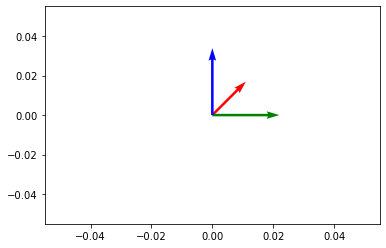

In [3]:
# Изобразить вектора на экране
vectors = np.array([x, y, z, ])
start = np.array([[0, 0, ], [0, 0, ], [0, 0 ], ])
plt.quiver( start[:,0 ], start[:,1 ], vectors[:,0 ], vectors[:,1 ], color=['r', 'g', 'b', ], scale=10 )

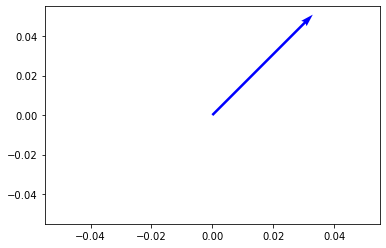

In [4]:
# Изобразить точку x + y + z
vectors_sum = x + y + z
plt.quiver( vectors_sum[0], vectors_sum[1], scale=10, color='b' )

In [5]:
# Найти угол между векторами x и y
angle= (round ( np.degrees( np.arccos( np.dot( x, y ) / 
                          ( np.linalg.norm( x ) * np.linalg.norm( y ) ) ) ), 0 ))
angle

45.0

In [6]:
# Даны дома из Бостона
df = pd.read_csv('boston_data.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [ ]:
# Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
# Написать код разложения дома по указанному базису
df = df.loc[:, df.columns != 'medv']
df.info()

In [ ]:
df

In [ ]:
def get_determinant(df):
    determinant = 0
    while determinant == 0:
        random_matrix = df.sample(n=13)
        determinant = np.linalg.det(random_matrix)
#     print(determinant)
    return random_matrix

invertible_matrix = get_determinant(df)
invertible_matrix

In [ ]:
df['slae'] = df.apply( (lambda row: np.linalg.solve( invertible_matrix, row )), axis=1 )
df['slae']

In [ ]:
df.iloc[[0]]

In [ ]:
# Проверка
np.dot( invertible_matrix, df['slae'][0])

In [7]:
# Проверка
np.dot( invertible_matrix, df['slae'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [8]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77


In [9]:
def get_determinant(df):
    determinant = 0
    while determinant == 0:
        random_matrix = df.sample(n=13)
        determinant = np.linalg.det(random_matrix)
#     print(determinant)
    return random_matrix

invertible_matrix = get_determinant(df)
invertible_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
234,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
170,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
82,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45
102,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
91,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94
283,2.31390,0.0,19.58,0.0,0.605,5.880,97.3,2.3887,5.0,403.0,14.7,348.13,12.03
98,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
20,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08
136,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46
268,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42


In [10]:
df['slae'] = df.apply( (lambda row: np.linalg.solve( invertible_matrix, row )), axis=1 )
df['slae']

0      [8.965006155179282, -45.58668823128316, -199.6...
1      [8.363897901504133, -43.023224837368616, -192....
2      [8.051297682163472, -44.19219470423997, -196.4...
3      [10.698128544301408, -58.694377987715974, -247...
4      [6.584310921461607, -35.5493617855069, -163.97...
                             ...                        
399    [19.635933041718207, -103.05046444023849, -420...
400    [20.7886342942716, -106.82840622589652, -410.1...
401    [6.418373623333982, -31.52018832276046, -149.0...
402    [10.099653853963481, -50.29971452300218, -221....
403    [9.267958825785861, -46.63511302977632, -204.6...
Name: slae, Length: 404, dtype: object

In [11]:
df.iloc[[0]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,slae
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,"[8.965006155179282, -45.58668823128316, -199.6..."


In [12]:
# Проверка
np.dot( invertible_matrix, df['slae'][0])

array([1.58760000e-01, 9.66338121e-13, 1.08100000e+01, 3.83693077e-13,
       4.13000000e-01, 5.96100000e+00, 1.75000000e+01, 5.28730000e+00,
       4.00000000e+00, 3.05000000e+02, 1.92000000e+01, 3.76940000e+02,
       9.88000000e+00])